In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data.csv')
df.head()

action_type combined_shot_type  game_event_id   game_id      lat  \
0          Jump Shot          Jump Shot             10  20000012  33.9723   
1          Jump Shot          Jump Shot             12  20000012  34.0443   
2          Jump Shot          Jump Shot             35  20000012  33.9093   
3          Jump Shot          Jump Shot             43  20000012  33.8693   
4  Driving Dunk Shot               Dunk            155  20000012  34.0443   

   loc_x  loc_y       lon  minutes_remaining  period   ...          shot_type  \
0    167     72 -118.1028                 10       1   ...     2PT Field Goal   
1   -157      0 -118.4268                 10       1   ...     2PT Field Goal   
2   -101    135 -118.3708                  7       1   ...     2PT Field Goal   
3    138    175 -118.1318                  6       1   ...     2PT Field Goal   
4      0      0 -118.2698                  6       2   ...     2PT Field Goal   

          shot_zone_area  shot_zone_basic  shot_zone_range     team_id  \
0          Right Side(R)        Mid-Range        16-24 ft.  1610612747   
1           Left Side(L)        Mid-Range         8-16 ft.  1610612747   
2   Left Side Center(LC)        Mid-Range        16-24 ft.  1610612747   
3  Right Side Center(RC)        Mid-Range        16-24 ft.  1610612747   
4              Center(C)  Restricted Area  Less Than 8 ft.  1610612747   

            team_name   game_date    matchup opponent  shot_id  
0  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        1  
1  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        2  
2  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        3  
3  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        4  
4  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        5  

[5 rows x 25 columns]

In [3]:
df.shape

(30697, 25)

In [4]:
random_sample = df.take(np.random.permutation(len(df))[:3])
random_sample.T

28690               22780  \
action_type                 Layup Shot  Reverse Layup Shot   
combined_shot_type               Layup               Layup   
game_event_id                      460                 264   
game_id                       40800223            21501164   
lat                            34.0443             34.0373   
loc_x                                0                 -12   
loc_y                                0                   7   
lon                            -118.27            -118.282   
minutes_remaining                    1                   0   
period                               4                   2   
playoffs                             1                   0   
season                         2008-09             2015-16   
seconds_remaining                   22                  24   
shot_distance                        0                   1   
shot_made_flag                       0                   1   
shot_type               2PT Field Goal      2PT Field Goal   
shot_zone_area               Center(C)           Center(C)   
shot_zone_basic        Restricted Area     Restricted Area   
shot_zone_range        Less Than 8 ft.     Less Than 8 ft.   
team_id                     1610612747          1610612747   
team_name           Los Angeles Lakers  Los Angeles Lakers   
game_date                   2009-05-08          2016-04-05   
matchup                      LAL @ HOU           LAL @ LAC   
opponent                           HOU                 LAC   
shot_id                          28691               22781   

                                    3306   
action_type                     Jump Shot  
combined_shot_type              Jump Shot  
game_event_id                         140  
game_id                          20200127  
lat                               33.9013  
loc_x                                  97  
loc_y                                 143  
lon                              -118.173  
minutes_remaining                       9  
period                                  2  
playoffs                                0  
season                            2002-03  
seconds_remaining                      41  
shot_distance                          17  
shot_made_flag                          0  
shot_type                  2PT Field Goal  
shot_zone_area      Right Side Center(RC)  
shot_zone_basic                 Mid-Range  
shot_zone_range                 16-24 ft.  
team_id                        1610612747  
team_name              Los Angeles Lakers  
game_date                      2002-11-15  
matchup                       LAL vs. GSW  
opponent                              GSW  
shot_id                              3307

In [5]:
not_needed = []

In [7]:
print(df['action_type'].unique())
print(df['combined_shot_type'].unique())

['Jump Shot' 'Driving Dunk Shot' 'Layup Shot' 'Running Jump Shot'
 'Driving Layup Shot' 'Reverse Layup Shot' 'Reverse Dunk Shot'
 'Slam Dunk Shot' 'Turnaround Jump Shot' 'Tip Shot' 'Running Hook Shot'
 'Alley Oop Dunk Shot' 'Dunk Shot' 'Alley Oop Layup shot'
 'Running Dunk Shot' 'Driving Finger Roll Shot' 'Running Layup Shot'
 'Finger Roll Shot' 'Fadeaway Jump Shot' 'Follow Up Dunk Shot' 'Hook Shot'
 'Turnaround Hook Shot' 'Running Tip Shot' 'Jump Hook Shot'
 'Running Finger Roll Shot' 'Jump Bank Shot' 'Turnaround Finger Roll Shot'
 'Hook Bank Shot' 'Driving Hook Shot' 'Running Reverse Layup Shot'
 'Driving Finger Roll Layup Shot' 'Fadeaway Bank shot' 'Pullup Jump shot'
 'Finger Roll Layup Shot' 'Turnaround Fadeaway shot'
 'Driving Reverse Layup Shot' 'Driving Slam Dunk Shot'
 'Step Back Jump shot' 'Reverse Slam Dunk Shot' 'Turnaround Bank shot'
 'Running Finger Roll Layup Shot' 'Floating Jump shot'
 'Putback Slam Dunk Shot' 'Running Bank shot' 'Driving Bank shot'
 'Putback Layup Shot'

In [9]:
not_needed.extend(['game_event_id', 'game_id'])


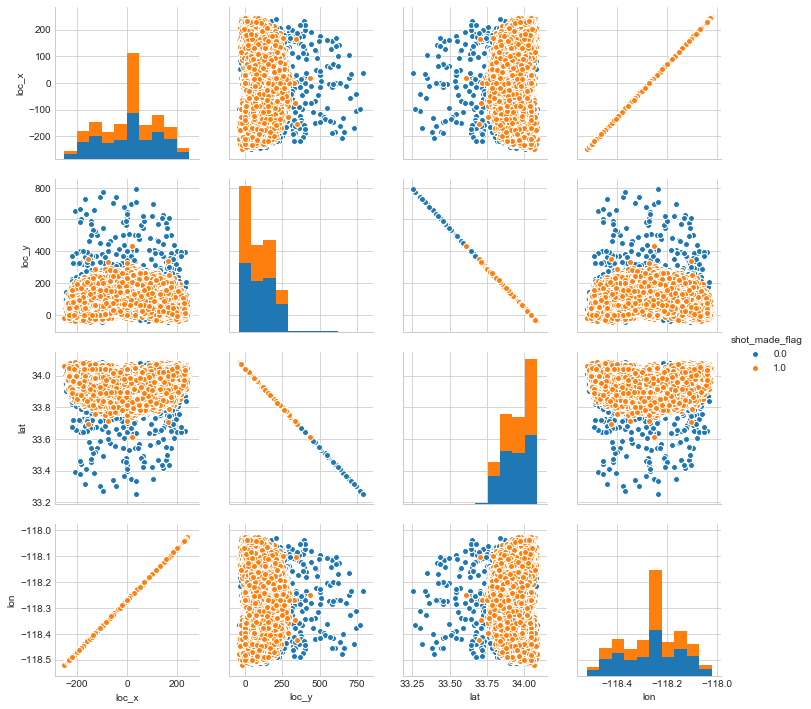

In [10]:
sns.set_style('whitegrid')
sns.pairplot(df, vars=['loc_x', 'loc_y', 'lat', 'lon'], hue='shot_made_flag')

In [11]:
not_needed.extend(['lon', 'lat'])

In [13]:
df['time_remaining'] = 60 * df.loc[:, 'minutes_remaining'] + df.loc[:, 'seconds_remaining']

In [14]:
not_needed.extend(['minutes_remaining', 'seconds_remaining'])

In [17]:
# period
df['period'].unique()


array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [16]:
# playoffs
df['playoffs'].unique()

array([0, 1], dtype=int64)

In [18]:
# shot_made_flag
df['shot_made_flag'].unique()

array([nan,  0.,  1.])

In [21]:
# Season

df['season'] = df['season'].apply(lambda x: x[:4])
df['season'] = pd.to_numeric(df['season'])

In [22]:
# shot distance
dist = pd.DataFrame({'true_dist': np.sqrt((df['loc_x']/10)**2 + (df['loc_y']/10)**2), 
                     'shot_dist': df['shot_distance']})
dist[:10]

true_dist  shot_dist
0  18.185984         18
1  15.700000         15
2  16.860012         16
3  22.286543         22
4   0.000000          0
5  14.541664         14
6   0.000000          0
7   2.801785          2
8  12.605158         12
9  12.928264         12

In [23]:
df['shot_distance_'] = dist['true_dist']
not_needed.append('shot_distance')

In [24]:
# shot type
df['shot_type'].unique()

array(['2PT Field Goal', '3PT Field Goal'], dtype=object)

In [25]:
# create 3pt_goal
df['3pt_goal'] = df['shot_type'].str.contains('3PT').astype('int')
not_needed.append('shot_type')

In [27]:
print(df['shot_zone_range'].unique()) # looks like we don't really need
print(df['shot_zone_area'].unique())
print(df['shot_zone_basic'].unique())

['16-24 ft.' '8-16 ft.' 'Less Than 8 ft.' '24+ ft.' 'Back Court Shot']
['Right Side(R)' 'Left Side(L)' 'Left Side Center(LC)'
 'Right Side Center(RC)' 'Center(C)' 'Back Court(BC)']
['Mid-Range' 'Restricted Area' 'In The Paint (Non-RA)' 'Above the Break 3'
 'Right Corner 3' 'Backcourt' 'Left Corner 3']


In [28]:
not_needed.append('shot_zone_range')

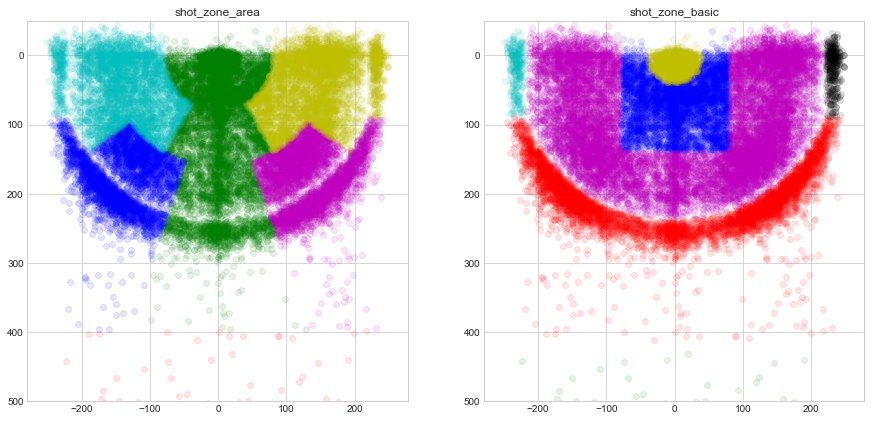

In [29]:
# visualization
# visualize shot_zone_area

area_group = df.groupby('shot_zone_area')
basic_group = df.groupby('shot_zone_basic')

plt.subplots(1, 2, figsize=(15, 7), sharey=True)
colors = list('rgbcmyk')

plt.subplot(121)
plt.ylim(500, -50)
plt.title('shot_zone_area')
for i, (_, area) in enumerate(area_group):
    plt.scatter(area['loc_x'], area['loc_y'], alpha=0.1, color=colors[i])
    
plt.subplot(122)
plt.ylim(500, -50)
plt.title('shot_zone_basic')
for i, (_, basic) in enumerate(basic_group):
    plt.scatter(basic['loc_x'], basic['loc_y'], alpha=0.1, color=colors[i])

In [30]:
# team id and name
print(df['team_id'].unique())
print(df['team_name'].unique())

[1610612747]
['Los Angeles Lakers']


In [32]:
# kobe was on same team so let's remove
not_needed.extend(['team_id', 'team_name'])

In [33]:
# convert game_date to datetime format
# split year, month, weekday

df['game_date'] = pd.to_datetime(df['game_date'])
df['game_year'] = df['game_date'].dt.year
df['game_month'] = df['game_date'].dt.month
df['game_day'] = df['game_date'].dt.dayofweek

not_needed.append('game_date')

In [34]:
# matchup and opponent
df['home_game'] = df['matchup'].str.contains('vs.').astype(int)
not_needed.append('matchup')

In [35]:
# shot id...set to index
df.set_index('shot_id', inplace=True)

In [36]:
# drop columns we don't need
df = df.drop(not_needed, axis=1)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30697 entries, 1 to 30697
Data columns (total 18 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null int64
shot_made_flag        25697 non-null float64
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
opponent              30697 non-null object
time_remaining        30697 non-null int64
shot_distance_        30697 non-null float64
3pt_goal              30697 non-null int32
game_year             30697 non-null int64
game_month            30697 non-null int64
game_day              30697 non-null int64
home_game             30697 non-null int32
dtypes: float64(2), int32(2), int64(9), object(5)
memory usage: 4.2+ MB


In [39]:
pd.set_option('display.max_columns', None)
random_sample = df.take(np.random.permutation(len(df))[:10])
random_sample.head(10)

action_type combined_shot_type  loc_x  loc_y  period  \
shot_id                                                                
28049             Jump Shot          Jump Shot    141     40       2   
21221             Jump Shot          Jump Shot    233     34       1   
8421              Jump Shot          Jump Shot     67    250       4   
18692    Fadeaway Jump Shot          Jump Shot   -127     42       5   
15330             Jump Shot          Jump Shot    -11    247       3   
22428      Pullup Jump shot          Jump Shot   -150    198       1   
25390             Jump Shot          Jump Shot     53     70       3   
27016             Jump Shot          Jump Shot   -177    -26       4   
18972             Jump Shot          Jump Shot    119    239       4   
8750     Fadeaway Jump Shot          Jump Shot    153     15       4   

         playoffs  season  shot_made_flag         shot_zone_area  \
shot_id                                                            
28049           1    2007             1.0          Right Side(R)   
21221           0    2014             0.0          Right Side(R)   
8421            0    2005             1.0              Center(C)   
18692           0    2011             0.0           Left Side(L)   
15330           0    2009             0.0              Center(C)   
22428           0    2015             NaN   Left Side Center(LC)   
25390           0    1999             0.0          Right Side(R)   
27016           1    2002             0.0           Left Side(L)   
18972           0    2011             0.0  Right Side Center(RC)   
8750            0    2005             0.0          Right Side(R)   

               shot_zone_basic opponent  time_remaining  shot_distance_  \
shot_id                                                                   
28049                Mid-Range      DEN             257       14.656398   
21221           Right Corner 3      MEM              65       23.546762   
8421         Above the Break 3      POR             373       25.882233   
18692                Mid-Range      BOS             280       13.376472   
15330        Above the Break 3      UTA             675       24.724482   
22428        Above the Break 3      MIN             331       24.840290   
25390    In The Paint (Non-RA)      MIL             670        8.780091   
27016                Mid-Range      MIN             182       17.889941   
18972        Above the Break 3      DET             120       26.698689   
8750                 Mid-Range      NOP             131       15.373354   

         3pt_goal  game_year  game_month  game_day  home_game  
shot_id                                                        
28049           0       2008           4         6          1  
21221           1       2014          11         1          0  
8421            1       2006           1         2          0  
18692           0       2012           2         3          0  
15330           1       2009          12         5          0  
22428           1       2016           2         1          1  
25390           0       2000           1         2          0  
27016           0       2003           4         6          0  
18972           1       2012           3         1          0  
8750            0       2006           2         5          0

In [40]:
### split data
submission_data = df[df['shot_made_flag'].isnull()]
submission_data = submission_data.drop('shot_made_flag', 1)
submission_data.shape

(5000, 17)

In [41]:
data = df[df['shot_made_flag'].notnull()]
data.shape

(25697, 18)

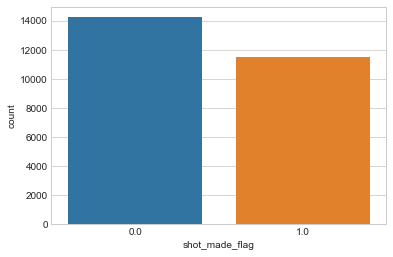

In [42]:
# data exploration
sns.countplot(x='shot_made_flag', data=data)

In [44]:
# make or miss
data['shot_made_flag'].value_counts()/ data['shot_made_flag'].shape
# kobe is a 46% career shooter

0.0    0.553839
1.0    0.446161
Name: shot_made_flag, dtype: float64

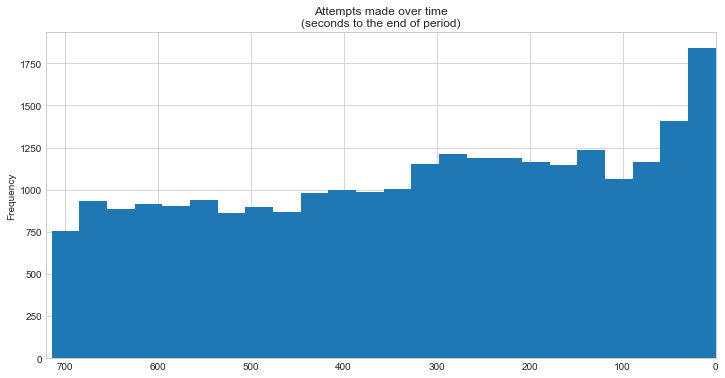

In [45]:
data['time_remaining'].plot(kind='hist', bins=24, xlim=(720, 0), figsize=(12,6),
                            title='Attempts made over time\n(seconds to the end of period)')

In [57]:
# in seconds...explore to minute and beyond
last_30 = data[data['time_remaining'] < 30]
last_30['shot_made_flag'].value_counts() / last_30['shot_made_flag'].shape

0.0    0.666305
1.0    0.333695
Name: shot_made_flag, dtype: float64

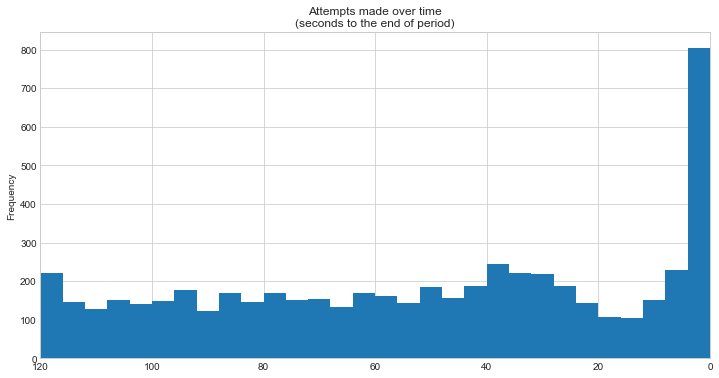

In [58]:
last_2min = data[data['time_remaining'] <= 120]

last_2min['time_remaining'].plot(kind='hist', bins=30, xlim=(120, 0), figsize=(12,6),
                            title='Attempts made over time\n(seconds to the end of period)')

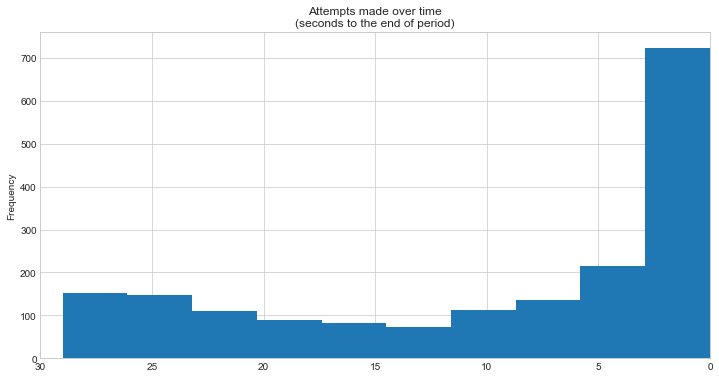

In [59]:
# back to last 30s
last_30['time_remaining'].plot(kind='hist', bins=10, xlim=(30, 0), figsize=(12,6),
                            title='Attempts made over time\n(seconds to the end of period)')

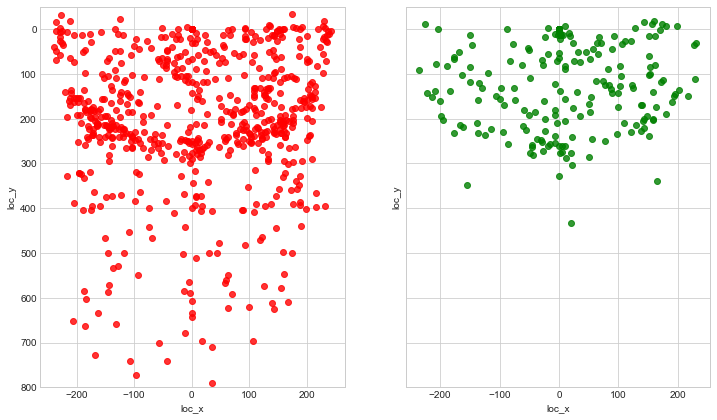

In [60]:
# last 5 seconds
last_5sec_misses = data[(data['time_remaining'] <= 5) & (data['shot_made_flag'] == 0)]
last_5sec_scores = data[(data['time_remaining'] <= 5) & (data['shot_made_flag'] == 1)]


fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12,7))
ax1.set_ylim(800, -50)

sns.regplot(x='loc_x', y='loc_y', data=last_5sec_misses, fit_reg=False, ax=ax1, color='r')
sns.regplot(x='loc_x', y='loc_y', data=last_5sec_scores, fit_reg=False, ax=ax2, color='g')

In [61]:
# close shots within 5 seconds
last_5sec_close = data[(data['time_remaining'] <= 5) & (data['shot_distance_'] <= 20)]

last_5sec_close['shot_made_flag'].value_counts() / last_5sec_close['shot_made_flag'].shape

0.0    0.604317
1.0    0.395683
Name: shot_made_flag, dtype: float64

In [62]:
# close shots
close_shots = data[(data['time_remaining'] > 5) & (data['shot_distance_'] <= 20)]

close_shots['shot_made_flag'].value_counts() / close_shots['shot_made_flag'].shape

0.0    0.512264
1.0    0.487736
Name: shot_made_flag, dtype: float64

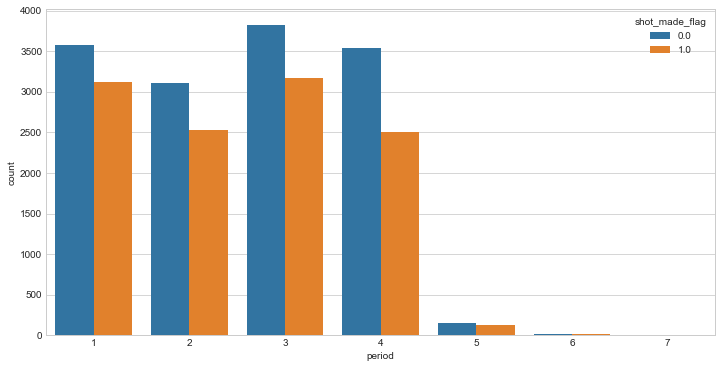

In [63]:
# period accuracy
plt.figure(figsize=(12,6))
sns.countplot(x="period", hue="shot_made_flag", data=data)

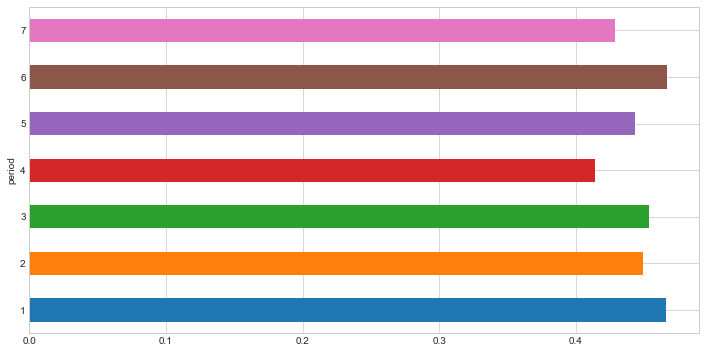

In [64]:
period_acc = data['shot_made_flag'].groupby(data['period']).mean()
period_acc.plot(kind='barh', figsize=(12, 6))

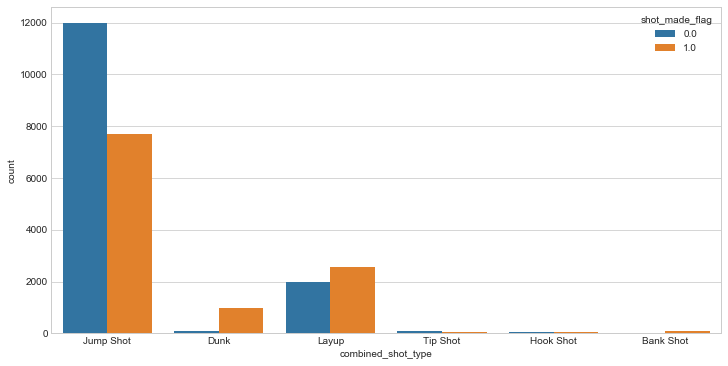

In [65]:
# accuracy based on shot type
plt.figure(figsize=(12,6))
sns.countplot(x="combined_shot_type", hue="shot_made_flag", data=data)

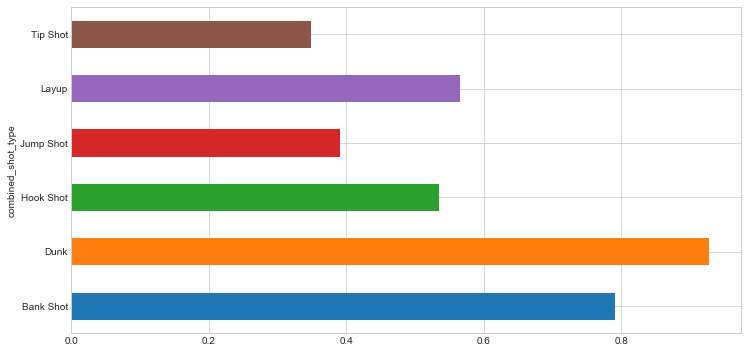

In [66]:
shot_type_acc = data['shot_made_flag'].groupby(data['combined_shot_type']).mean()
shot_type_acc.plot(kind='barh', figsize=(12, 6))

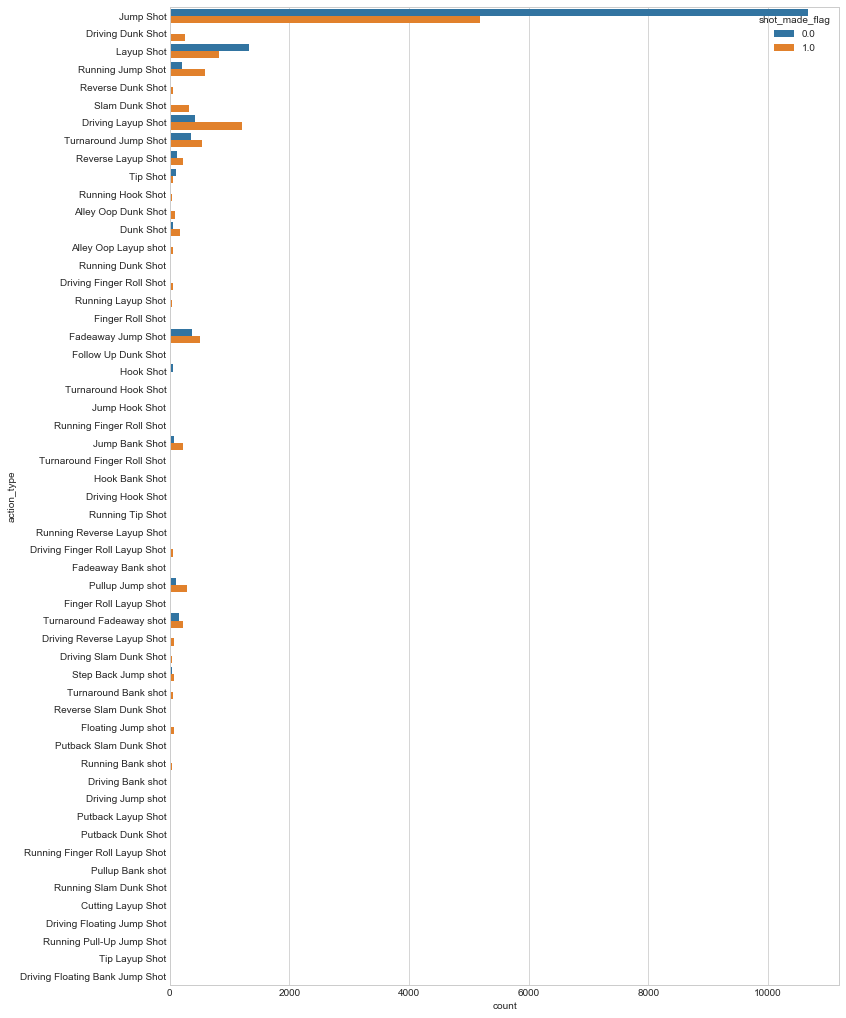

In [67]:
# action type...# of shots
plt.figure(figsize=(12,18))
sns.countplot(y="action_type", hue="shot_made_flag", data=data)

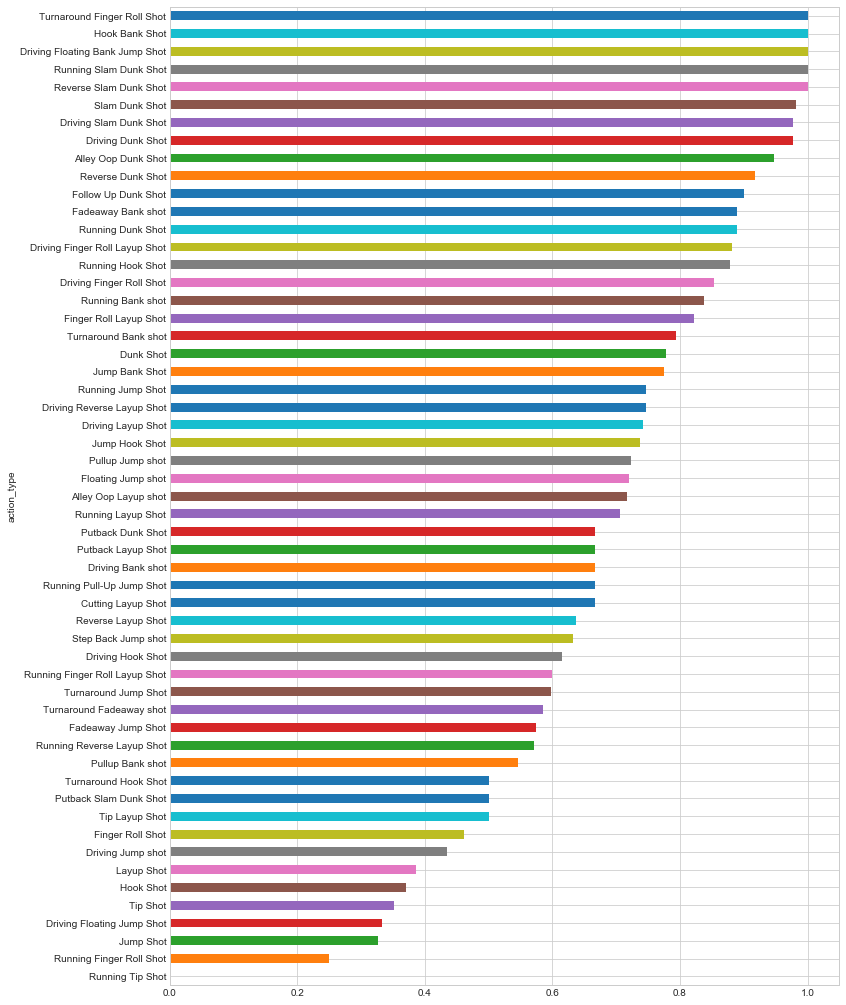

In [68]:
action_type = data['shot_made_flag'].groupby(data['action_type']).mean()
action_type.sort_values()

action_type.sort_values().plot(kind='barh', figsize=(12, 18))

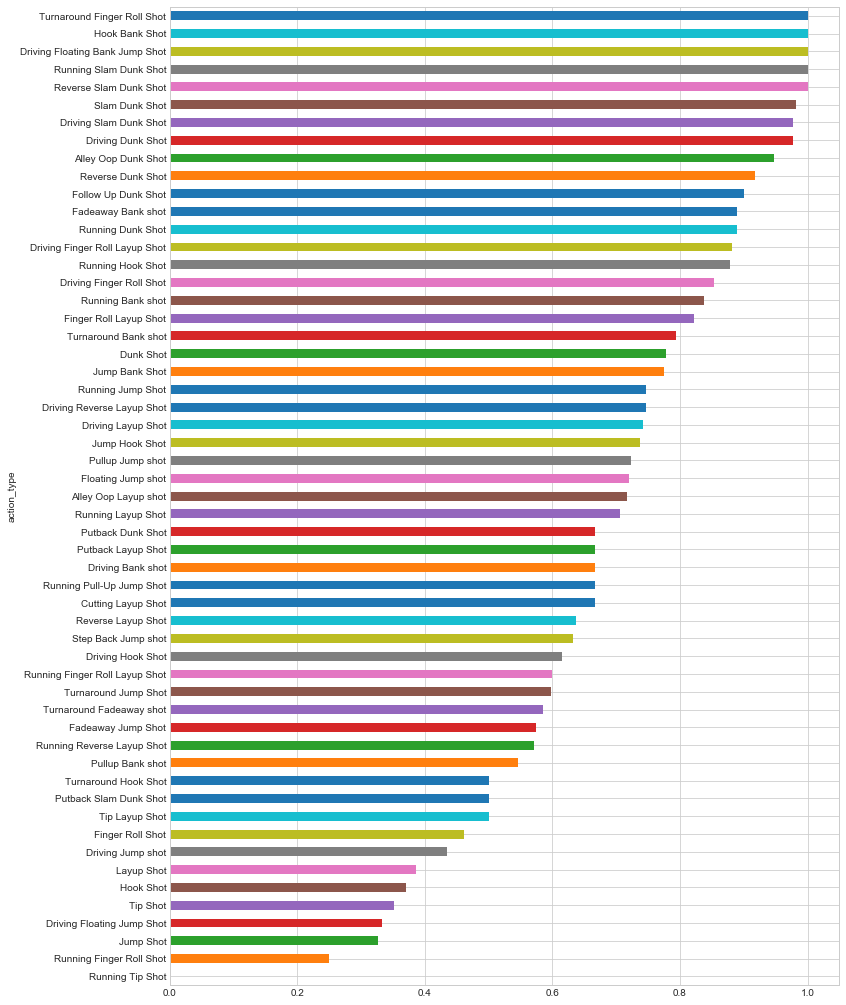

In [69]:
 action_type = data['shot_made_flag'].groupby(data['action_type']).mean()
action_type.sort_values()

action_type.sort_values().plot(kind='barh', figsize=(12, 18))

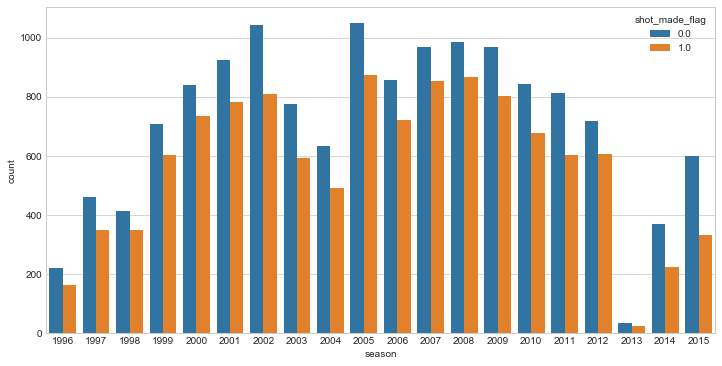

In [70]:
# career accuracy
plt.figure(figsize=(12,6))
sns.countplot(x="season", hue="shot_made_flag", data=data)

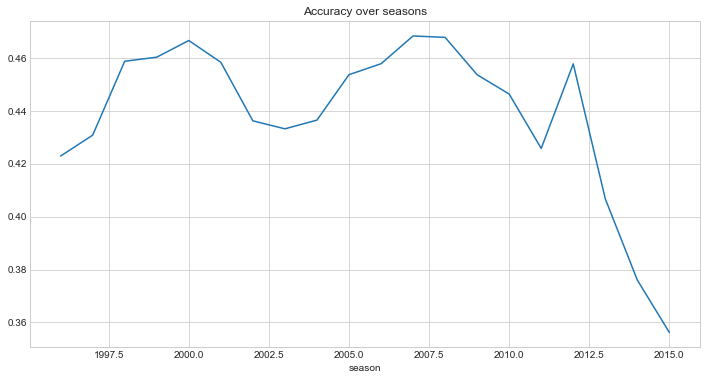

In [71]:
season_acc = data['shot_made_flag'].groupby(data['season']).mean()
season_acc.plot(figsize=(12, 6), title='Accuracy over seasons')

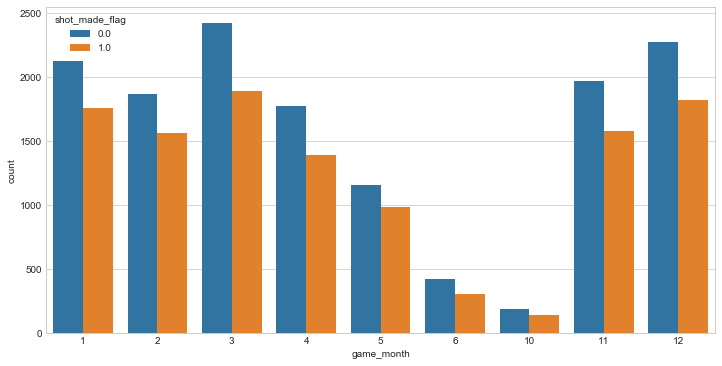

In [72]:
# shots per month
plt.figure(figsize=(12,6))
sns.countplot(x="game_month", hue="shot_made_flag", data=data)

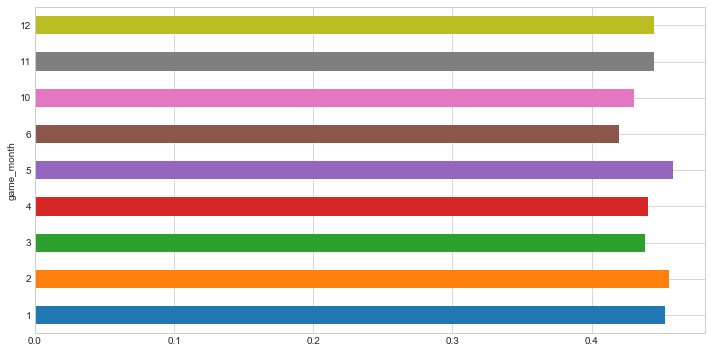

In [73]:
game_month = data['shot_made_flag'].groupby(data['game_month']).mean()
game_month.plot(kind='barh', figsize=(12, 6))

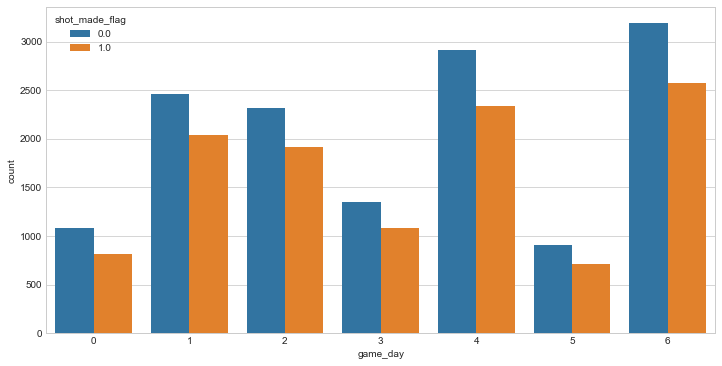

In [74]:
# by day of week
plt.figure(figsize=(12,6))
sns.countplot(x="game_day", hue="shot_made_flag", data=data)

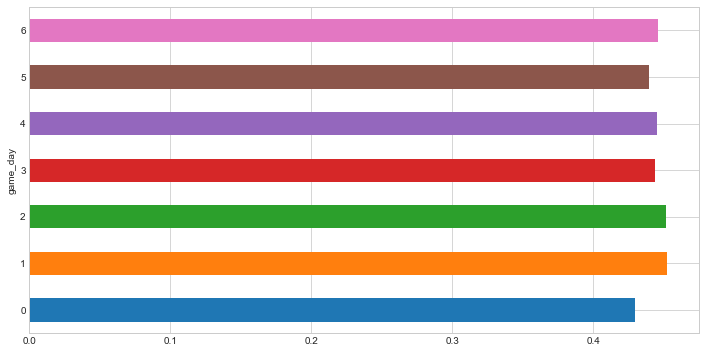

In [75]:
game_day = data['shot_made_flag'].groupby(data['game_day']).mean()
game_day.plot(kind='barh', figsize=(12, 6))

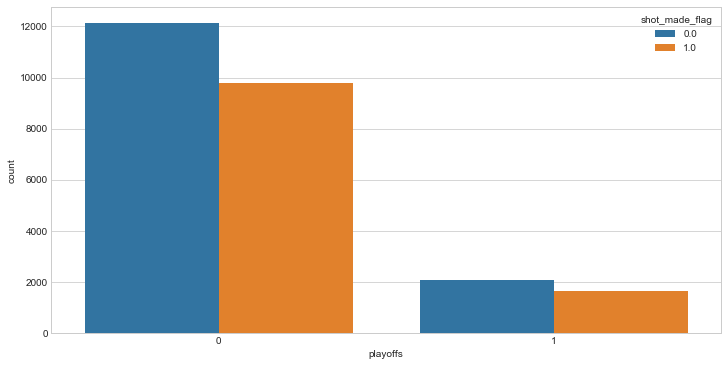

In [76]:
# regular season vs playoffs
plt.figure(figsize=(12,6))
sns.countplot(x="playoffs", hue="shot_made_flag", data=data)

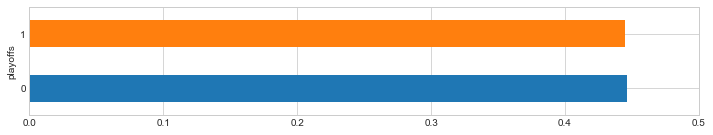

In [77]:
playoffs = data['shot_made_flag'].groupby(data['playoffs']).mean()
playoffs.plot(kind='barh', figsize=(12, 2), xlim=(0, 0.50))

In [78]:
# accuracy based on shot distance
distance_bins = np.append(np.arange(0, 31, 3), 300) 
distance_cat = pd.cut(data['shot_distance_'], distance_bins, right=False)

dist_data = data.loc[:, ['shot_distance_', 'shot_made_flag']]
dist_data['distance_cat'] = distance_cat

distance_cat.value_counts(sort=False)

[0, 3)       5613
[3, 6)       1080
[6, 9)       1728
[9, 12)      1718
[12, 15)     2324
[15, 18)     3362
[18, 21)     3319
[21, 24)     1735
[24, 27)     3954
[27, 30)      683
[30, 300)     181
Name: shot_distance_, dtype: int64

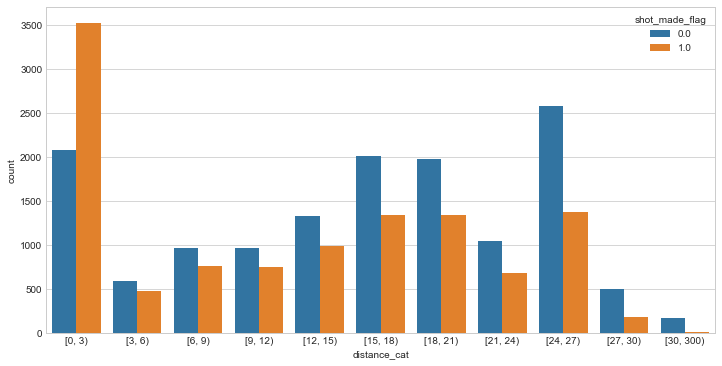

In [79]:
# number of shots in each distance category
plt.figure(figsize=(12,6))
sns.countplot(x="distance_cat", hue="shot_made_flag", data=dist_data)

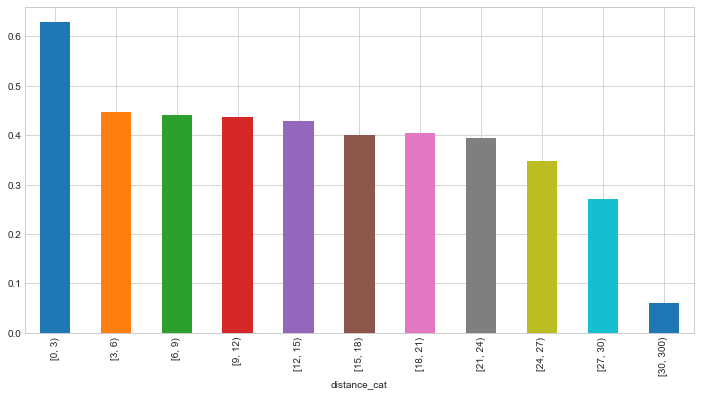

In [80]:
dist_prec = dist_data['shot_made_flag'].groupby(dist_data['distance_cat']).mean()
dist_prec.plot(kind='bar', figsize=(12, 6))

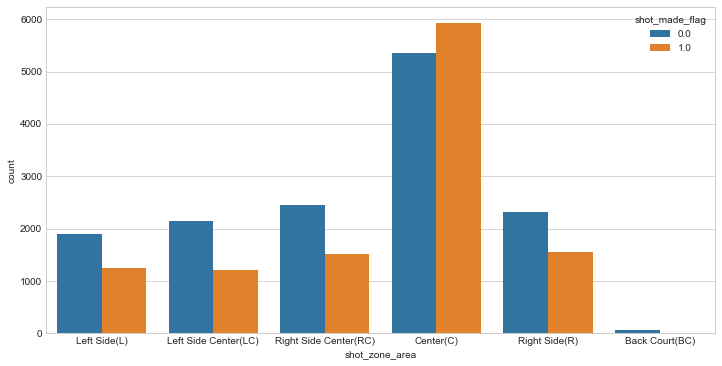

In [81]:
# accuracy based on shot zones
plt.figure(figsize=(12,6))
sns.countplot(x="shot_zone_area", hue="shot_made_flag", data=data)

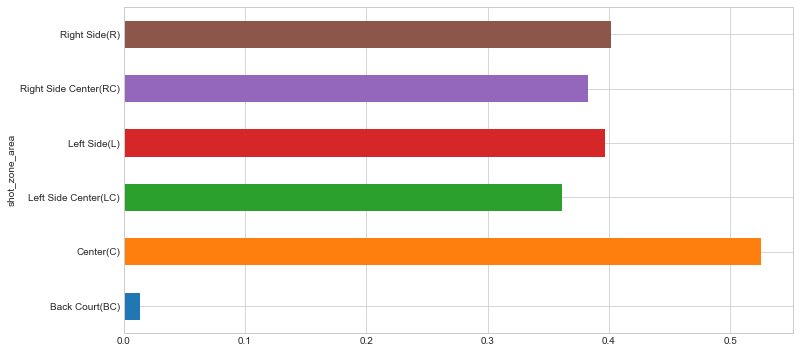

In [82]:
shot_area = data['shot_made_flag'].groupby(data['shot_zone_area']).mean()
shot_area.plot(kind='barh', figsize=(12, 6))

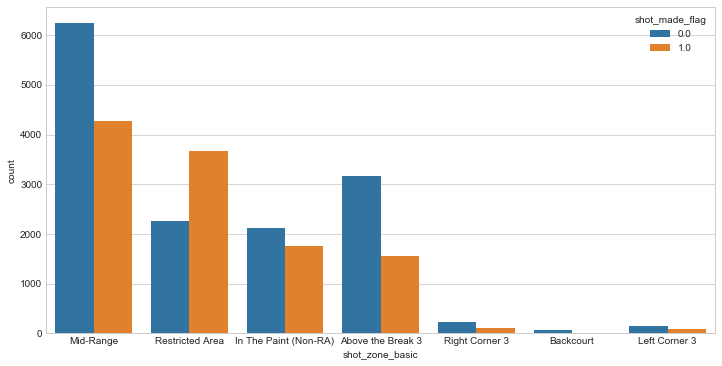

In [83]:
# shot zone basic
plt.figure(figsize=(12,6))
sns.countplot(x="shot_zone_basic", hue="shot_made_flag", data=data)

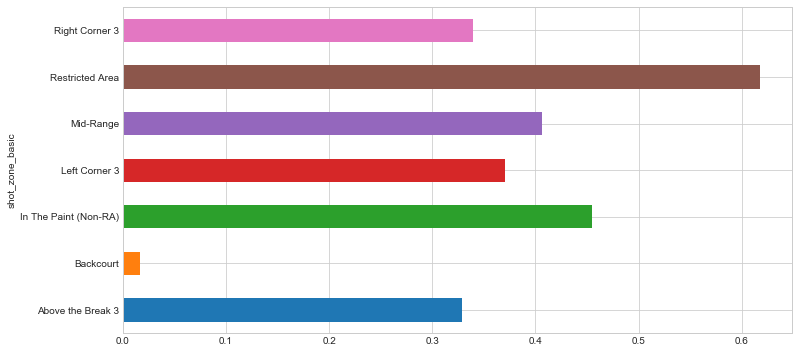

In [84]:
shot_basic = data['shot_made_flag'].groupby(data['shot_zone_basic']).mean()
shot_basic.plot(kind='barh', figsize=(12, 6))

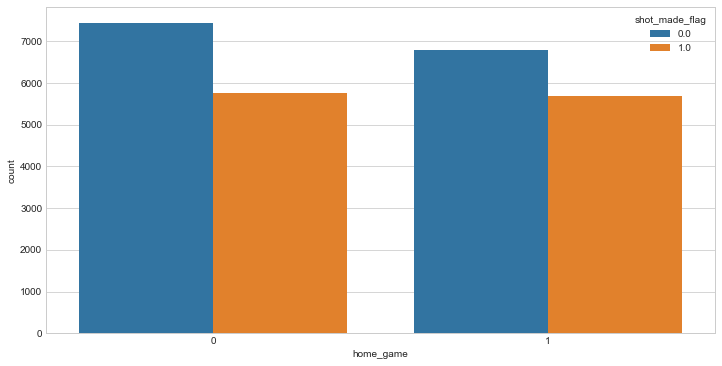

In [85]:
# home vs away
plt.figure(figsize=(12,6))
sns.countplot(x="home_game", hue="shot_made_flag", data=data)

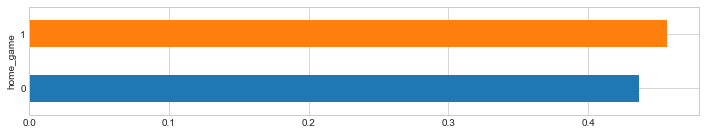

In [86]:
shot_basic = data['shot_made_flag'].groupby(data['home_game']).mean()
shot_basic.plot(kind='barh', figsize=(12, 2))

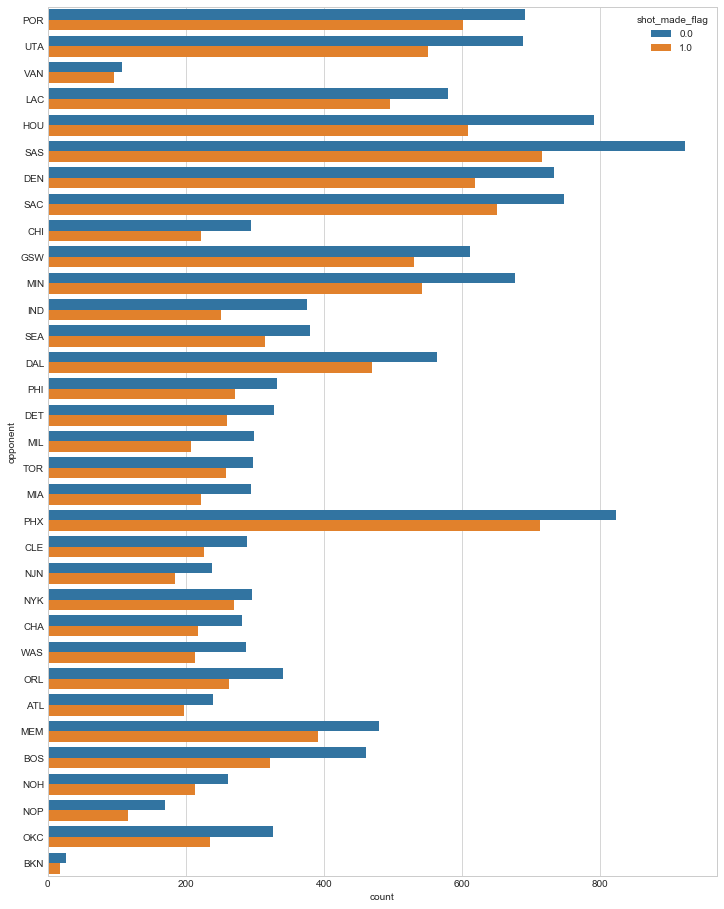

In [87]:
# accuracy compared to opponent
plt.figure(figsize=(12,16))
sns.countplot(y="opponent", hue="shot_made_flag", data=data)

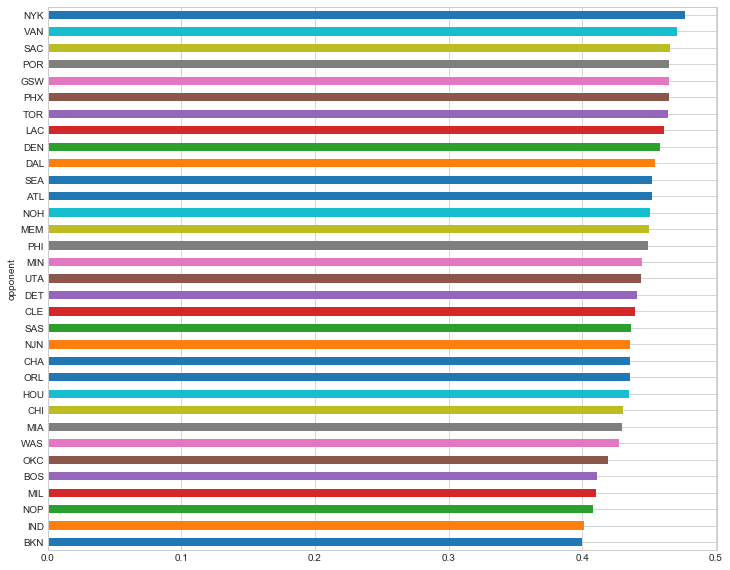

In [88]:
opponent = data['shot_made_flag'].groupby(data['opponent']).mean()
opponent.sort_values().plot(kind='barh', figsize=(12,10))